<a href="https://colab.research.google.com/github/shubhM13/monzo_account_analytics/blob/main/colab_notebooks/7day_rolling_active_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Create a BigQuery client
client = bigquery.Client(project='analytics-take-home-test')

query = """
SELECT *
FROM `analytics-take-home-test.monzo_datawarehouse_shubh_mart.mt_rolling_7day_active_users`
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Display the DataFrame
df.head()


,date,active_users_count
0,2017-08-11,1
1,2017-08-19,1
2,2017-08-20,2
3,2017-08-23,3
4,2017-08-25,4


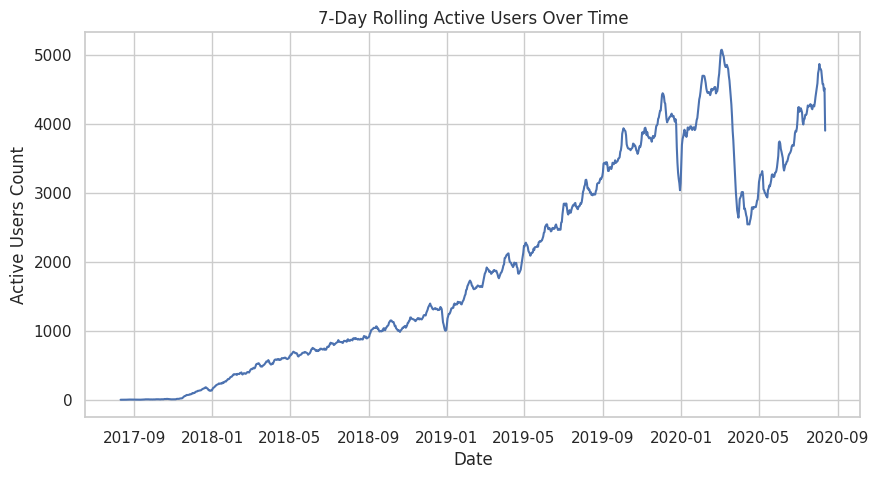

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already queried the data into a DataFrame called df

# Line plot for 7-day rolling active users over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='active_users_count', data=df)
plt.title('7-Day Rolling Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Active Users Count')
plt.grid(True)
plt.show()


# Weekly and Monthly Aggregation of Active Users

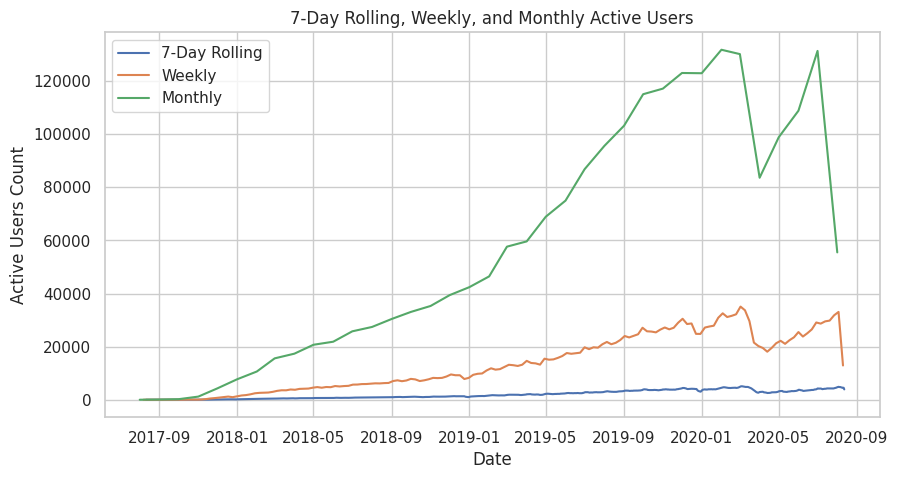

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already queried the data into a DataFrame called df

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Adding weekly and monthly aggregations
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)

weekly_aggregation = df.groupby('week')['active_users_count'].sum().reset_index()
monthly_aggregation = df.groupby('month')['active_users_count'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='active_users_count', data=df, label='7-Day Rolling')
sns.lineplot(x='week', y='active_users_count', data=weekly_aggregation, label='Weekly')
sns.lineplot(x='month', y='active_users_count', data=monthly_aggregation, label='Monthly')
plt.title('7-Day Rolling, Weekly, and Monthly Active Users')
plt.xlabel('Date')
plt.ylabel('Active Users Count')
plt.grid(True)
plt.legend()
plt.show()

# Seasonality Analysis

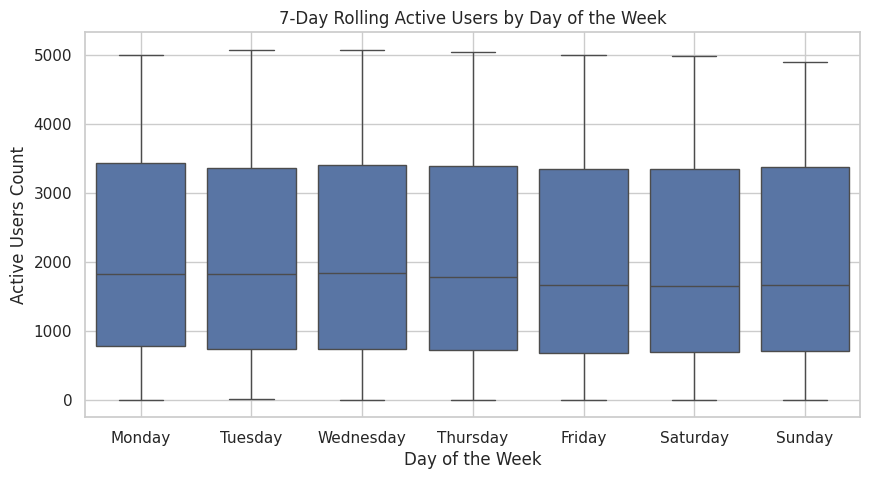

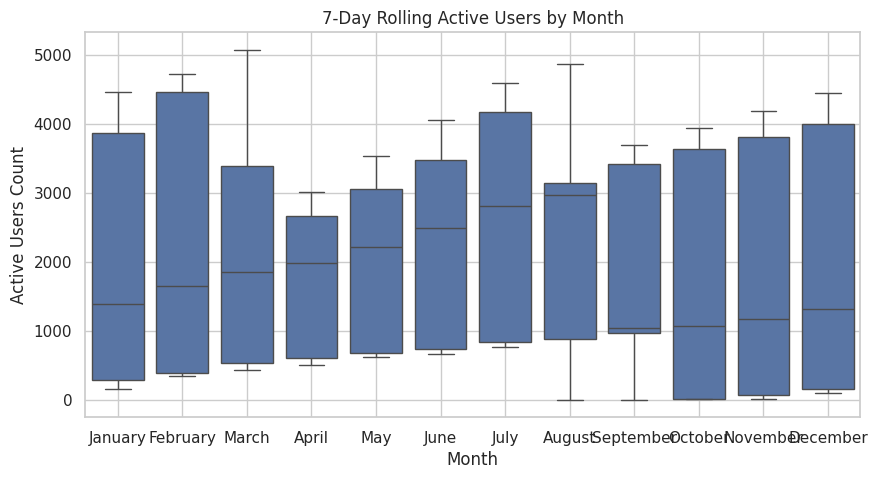

In [ ]:
import pandas as pd
# Day of the week analysis
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_week', y='active_users_count', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('7-Day Rolling Active Users by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Active Users Count')
plt.grid(True)
plt.show()

# Month analysis
df['month'] = df['date'].dt.month_name()

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='active_users_count', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('7-Day Rolling Active Users by Month')
plt.xlabel('Month')
plt.ylabel('Active Users Count')
plt.grid(True)
plt.show()

# Distribution Analysis

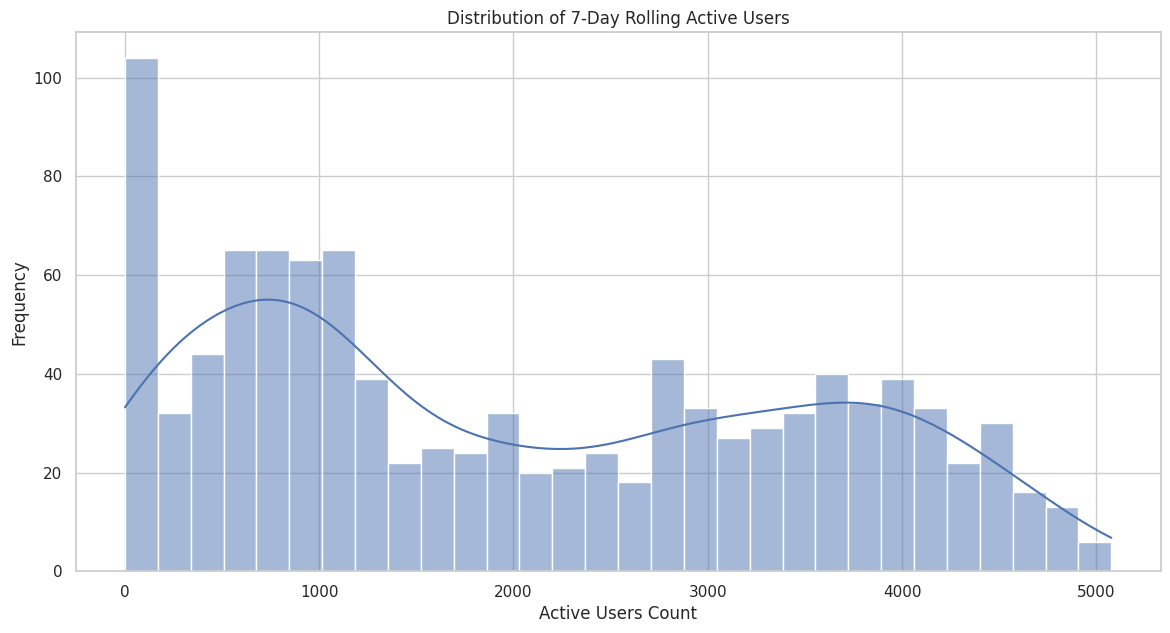

In [19]:
plt.figure(figsize=(14, 7))
sns.histplot(df['active_users_count'], bins=30, kde=True)
plt.title('Distribution of 7-Day Rolling Active Users')
plt.xlabel('Active Users Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
